### Practica 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [2]:
data = pd.read_csv("seeds_dataset.txt", sep="\t")

In [3]:
data

15.26  14.84   0.871  5.763  3.312  2.221   5.22  1
0    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
1    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
2    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
3    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
4    14.38  14.21  0.8951  5.386  3.312  2.462  4.956  1
..     ...    ...     ...    ...    ...    ...    ... ..
204  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
205  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
206  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
207  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
208  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[209 rows x 8 columns]

In [4]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
K = 10
cv_strat = StratifiedKFold(n_splits=K, shuffle=True)

In [7]:
max_clusters = 50
min_clusters = np.unique(Y).shape[0]
k = []
for i in range(min_clusters, max_clusters + 1):
    k.append(str(i))
    
tabla = pd.DataFrame(columns=k, data=np.zeros((K, max_clusters - min_clusters + 1), dtype=float))
tabla.columns.name = "CLusters"
tabla.index.name = "CV"

In [8]:
for c in k:
    kmeans = KMeans(n_clusters=int(c), random_state=0)
    cv = 0
    for train_index, test_index in cv_strat.split(X, Y):
        X_train = X[train_index]
        Y_train = Y[train_index]
        X_test = X[test_index]
        Y_test = Y[test_index]
        kmeans.fit(X_train)
        moda = -1 * np.ones(int(c), dtype="int")
        for i in range(int(c)):
            moda[i] = mode(Y_train[(kmeans.labels_ == i)])[0]
        predict = moda[kmeans.predict(X_test)]
        tabla.loc[cv, c] = accuracy_score(predict, Y_test)
        cv += 1

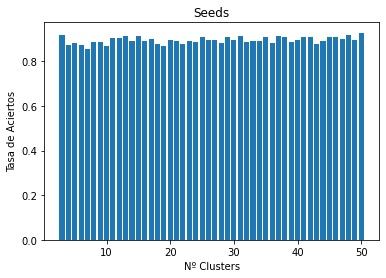

In [9]:
import matplotlib
import matplotlib.pyplot as plt
plt.bar(np.arange(min_clusters, max_clusters + 1, dtype="int"), tabla.mean(axis=0))
plt.title("Seeds")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa de Aciertos")
plt.show()

In [10]:
print("El k óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "con una tasa de aciertos de:", tabla.mean(axis=0).max())

El k óptimo es: 50 con una tasa de aciertos de: 0.9285714285714285


### Práctica 3

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage, cut_tree
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn import datasets

In [12]:
iris = datasets.load_iris()

In [13]:
Y = iris.target

In [14]:
X = MinMaxScaler().fit_transform(iris.data)

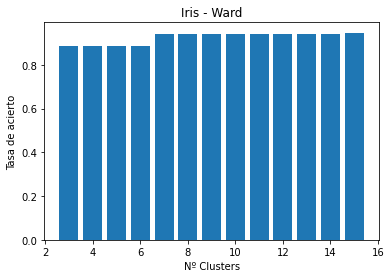

In [15]:
lward = linkage(X, method="ward", metric="euclidean")

max_clusters = 15
min_clusters = np.unique(Y).shape[0]
k = []

for i in range(min_clusters, max_clusters + 1):
    k.append(str(i))

tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters - min_clusters + 1), dtype="float"))
tabla.columns.name = "Clusters"

for c in k:
    labels = cut_tree(lward, n_clusters=int(c)).reshape(-1)
    moda = -1 * np.ones(int(c), dtype="int")
    for i in range(int(c)):
        moda[i] = mode(Y[(labels == i)])[0]
    predict = moda[labels]
    tabla.loc[0, c] = accuracy_score(predict, Y)

plt.bar(np.arange(min_clusters, max_clusters + 1, dtype="int"), tabla.mean(axis=0))
plt.title("Iris - Ward")
plt.xlabel("Nº Clusters")
plt.ylabel("Tasa de acierto")
plt.show()

In [16]:
lward = print("El k óptimo es:", tabla.columns[tabla.mean(axis=0).argmax()], "con una tasa de aciertos de:", tabla.mean(axis=0).max())

El k óptimo es: 15 con una tasa de aciertos de: 0.9466666666666667


### Practica 4

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, cut_tree
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn import datasets

In [18]:
iris = datasets.load_iris()

In [19]:
X = StandardScaler().fit_transform(iris.data)
Y = iris.target

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.66, stratify=Y)

In [21]:
kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(X_train)
kmoda = -1 * np.ones(15, dtype="int")
for i in range(15):
    kmoda[i] = mode(Y_train[(kmeans.labels_ == i)])[0]
kpredict = kmoda[kmeans.predict(X_test)]
kacc = accuracy_score(kpredict, Y_test)
kacc

0.9019607843137255

In [22]:
lward = linkage(kmeans.cluster_centers_, method="ward", metric="euclidean")
labels = cut_tree(lward, n_clusters=6).reshape(-1)
wmoda = -1 * np.ones(6, dtype="int")
for i in range(6):
    wmoda[i] = mode(kmoda[(labels == i)])[0]
wpredict = wmoda[labels]
wacc = accuracy_score(wpredict, kmoda)
wacc

0.8666666666666667

In [23]:
bar = []
for i in range(6):
    bar.append(np.mean(kmeans.cluster_centers_[labels == i], axis=0).tolist())
bar = np.array(bar)

In [24]:
kmeans = KMeans(n_clusters=6, init=bar, random_state=0)
kmeans.fit(X_train)
kmoda = -1 * np.ones(6, dtype="int")
for i in range(6):
    kmoda[i] = mode(Y_train[kmeans.labels_ == i])[0]
predict = kmoda[kmeans.predict(X_test)]
acc = accuracy_score(predict, Y_test)
acc

C:\Users\juanm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


0.8431372549019608

In [25]:
kmeans = KMeans(n_clusters=6, init="random", random_state=0)
kmeans.fit(X_train)
kmoda = -1 * np.ones(6, dtype="int")
for i in range(6):
    kmoda[i] = mode(Y_train[kmeans.labels_ == i])[0]
predict = kmoda[kmeans.predict(X_test)]
acc = accuracy_score(predict, Y_test)
acc

0.8627450980392157

In [26]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=0)
kmeans.fit(X_train)
kmoda = -1 * np.ones(6, dtype="int")
for i in range(6):
    kmoda[i] = mode(Y_train[kmeans.labels_ == i])[0]
predict = kmoda[kmeans.predict(X_test)]
acc = accuracy_score(predict, Y_test)
acc

0.8431372549019608

### Práctica 5

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score

In [28]:
class neurona(object):
    def __init__(self, f=0, c=0, dim=0):
        self.c = c
        self.f = f
        self.dim = dim
        self.w = normalize(0.5 - np.random.rand(self.dim).reshape(1,-1))
        self.output = -10
        self.label = -1

    def predict(self, inputs):
        self.output = inputs @ self.w.T
        return self.output
    
    def fit(self, inputs, alfa=1):
        self.w = normalize(self.w + (alfa*inputs))
        
    def labeling(self, inputs, target):
        Y = inputs @ self.w.T
        self.label = target[np.argmax(Y)]

In [29]:
class som():
    
    def __init__(self, filas=1, columnas=1, dim=1):
        self.filas = filas
        self.columnas = columnas
        self.dim = dim
        self.neuron = [[neurona(f=i, c=j, dim=self.dim)for j in range(self.columnas)]for i in range(self.filas)]
        
    def fit(self, inputs, max_epochs=1, init_radious=0, init_alfa=1):
        self.radious = init_radious
        self.alfa = init_alfa
        t = 0
        P = inputs.shape[0]
        for epoch in range(max_epochs):
            for x in inputs:
                self.alfa = init_alfa/(1.0 + float(t/P))
                f_gana, c_gana, y_gana = -1, -1, float('-inf')
                for f in range(self.filas):
                    for c in range (self.columnas):
                        y_predict = self.neuron[f][c].predict(x)
                        if y_predict > y_gana:
                            f_gana = f
                            c_gana = c
                            y_gana = y_predict
                            
                for f in range(f_gana - self.radious, f_gana + self.radious+1):
                    if f < 0:
                        row = self.filas + f
                    else:
                        if f > self.filas-1:
                            row = f % self.filas
                        else:
                            row = f
                    for c in range(c_gana - self.radious, c_gana + self.radious+1):
                        if c < 0:
                            column = self.columnas + c
                        else:
                            if c > self.columnas-1:
                                column = c % self.columnas
                            else:
                                column = c
                        self.neuron[row][column].fit(x.reshape(1,-1),alfa=self.alfa)
                t += 1
                if (t%(P/10)) == 0:
                    print(t, self.radious, ' ', end='')
            if self.radious > 0:
                self.radious -= 1
    
    def neuron_labeling(self, inputs, target):
        for f in range(self.filas):
            for c in range(self.columnas):
                self.neuron[f][c].labeling(inputs, target)
                
    def output_predict(self, inputs):
        output = np.zeros((inputs.shape[0], self.filas, self.columnas), dtype=float)
        for i,x in enumerate(inputs):
            for f in range(self.filas):
                for c in range(self.columnas):
                    output[i,f,c] = self.neuron[f][c].predict(x)
        return output
    
    def label_predict(self, x):
        f_gana, c_gana, y_gana = -1,-1,float('-inf')
        for f in range(self.filas):
            for c in range(self.columnas):
                y_predict = self.neuron[f][c].predict(x)
                if y_predict > y_gana:
                    f_gana = f
                    c_gana = c
                    y_gana = y_predict
        return self.neuron[f_gana][c_gana].label

In [30]:
mnist = fetch_openml("mnist_784", version=1)

In [31]:
mnist_ext = np.append(mnist.data, np.ones((mnist.data.shape[0], 1), dtype=float), axis=1)

In [32]:
X = normalize(mnist_ext, axis=1)

In [33]:
Y = mnist.target

In [34]:
XR = X[:700]

In [35]:
YR= np.array(Y[:700])

In [36]:
type(XR), type(YR)

(numpy.ndarray, numpy.ndarray)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(XR, YR, train_size=600, stratify=YR)

In [38]:
mao = som(filas=15, columnas=9, dim=X_train.shape[1])

In [39]:
mao.fit(X_train, max_epochs=20, init_radious=4, init_alfa=10)

60 4  120 4  180 4  240 4  300 4  360 4  420 4  480 4  540 4  600 4  660 3  720 3  780 3  840 3  900 3  960 3  1020 3  1080 3  1140 3  1200 3  1260 2  1320 2  1380 2  1440 2  1500 2  1560 2  1620 2  1680 2  1740 2  1800 2  1860 1  1920 1  1980 1  2040 1  2100 1  2160 1  2220 1  2280 1  2340 1  2400 1  2460 0  2520 0  2580 0  2640 0  2700 0  2760 0  2820 0  2880 0  2940 0  3000 0  3060 0  3120 0  3180 0  3240 0  3300 0  3360 0  3420 0  3480 0  3540 0  3600 0  3660 0  3720 0  3780 0  3840 0  3900 0  3960 0  4020 0  4080 0  4140 0  4200 0  4260 0  4320 0  4380 0  4440 0  4500 0  4560 0  4620 0  4680 0  4740 0  4800 0  4860 0  4920 0  4980 0  5040 0  5100 0  5160 0  5220 0  5280 0  5340 0  5400 0  5460 0  5520 0  5580 0  5640 0  5700 0  5760 0  5820 0  5880 0  5940 0  6000 0  6060 0  6120 0  6180 0  6240 0  6300 0  6360 0  6420 0  6480 0  6540 0  6600 0  6660 0  6720 0  6780 0  6840 0  6900 0  6960 0  7020 0  7080 0  7140 0  7200 0  7260 0  7320 0  7380 0  7440 0  7500 0  7560 0  7620 0  7

In [40]:
mao.neuron_labeling(inputs=X_train, target=Y_train)

In [41]:
labels = [mao.label_predict(x) for x in X_test]

In [42]:
acc = accuracy_score(labels, Y_test)

In [43]:
acc

0.81

### Practica 7

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [46]:
(Train_images, Train_labels), (Test_images, Test_labels) = fashion_mnist.load_data()
Train_images = Train_images.reshape(60000, 28, 28, 1)
Train_images = Train_images.astype("float32")/255
Test_images = Test_images.reshape(10000, 28, 28, 1)
Test_images = Test_images.astype("float32")/255
Train_labels = to_categorical(Train_labels)
Test_labels = to_categorical(Test_labels)

In [47]:
history = model.fit(Train_images, Train_labels, epochs=5, validation_data=(Test_images, Test_labels), batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.6501 - accuracy: 0.7619 - val_loss: 0.5243 - val_accuracy: 0.8082
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.4247 - accuracy: 0.8433 - val_loss: 0.4669 - val_accuracy: 0.8298
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3619 - accuracy: 0.8681 - val_loss: 0.3732 - val_accuracy: 0.8666
Epoch 4/5
938/938 [==============================] - 6s 6ms/step - loss: 0.3251 - accuracy: 0.8795 - val_loss: 0.3425 - val_accuracy: 0.8782
Epoch 5/5
938/938 [==============================] - 6s 6ms/step - loss: 0.2970 - accuracy: 0.8906 - val_loss: 0.3484 - val_accuracy: 0.8756


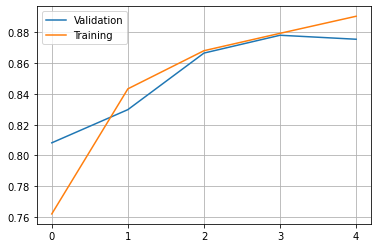

In [48]:
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation")
plt.plot(history.epoch, history.history["accuracy"], label="Training")
plt.legend()
plt.grid()
plt.xticks(history.epoch)
plt.show()

### Practica 6

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split

In [50]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1: 
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [51]:
import keras.backend as K
def porcentaje_margen(y_true, y_pred):
    margen = 0.02
    yy = K.sum(K.cast(K.less(K.abs((y_pred/y_true)-1.0), margen), dtype=float))
    return yy/K.cast(K.shape(y_pred)[0], dtype=float)

In [52]:
history = pd.read_excel("historica_Iberdrola_DIC_16-19.xls")

In [53]:
XMAX = 15
T = 20
n_features = 1
X_data, Y_data = split_sequence(sequence=history["Último"], n_steps=T)
X = X_data/XMAX
Y = Y_data/XMAX

In [54]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=2/3)

In [56]:
model = models.Sequential()
model.add(layers.LSTM(5, return_sequences=False, input_shape=(T, n_features)))
model.add(layers.Dense(1))
model.compile(optimizer="adam", loss="mse", metrics=[porcentaje_margen])

In [57]:
h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), validation_steps=1, steps_per_epoch=48, epochs=2, verbose=1)

Epoch 1/2
48/48 [==============================] - 2s 12ms/step - loss: 0.0210 - porcentaje_margen: 0.0646 - val_loss: 0.0018 - val_porcentaje_margen: 0.0583
Epoch 2/2
48/48 [==============================] - 0s 4ms/step - loss: 0.0012 - porcentaje_margen: 0.2042 - val_loss: 0.0011 - val_porcentaje_margen: 0.1625


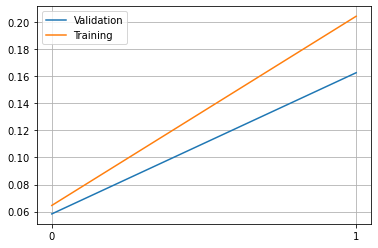

In [58]:
plt.plot(h.epoch, h.history["val_porcentaje_margen"], label="Validation")
plt.plot(h.epoch, h.history["porcentaje_margen"], label="Training")
plt.legend()
plt.grid()
plt.xticks(h.epoch)
plt.show()

### Practica 4 - II

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage, cut_tree
from scipy.stats import mode

In [60]:
iris = load_iris()

In [61]:
X = StandardScaler().fit_transform(iris.data)
Y = iris.target

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=2/3, stratify=Y)

In [63]:
kmeans = KMeans(n_clusters=15, random_state=0)
kmeans.fit(X_train)
kmoda = -1 * np.ones(15, dtype="int")
for i in range(15):
    kmoda[i] = mode(Y_train[(kmeans.labels_ == i)])[0]
kpredict = kmoda[kmeans.predict(X_test)]
kac = accuracy_score(kpredict, Y_test)
kac

0.86

In [64]:
lward = linkage(kmeans.cluster_centers_, method="ward", metric="euclidean")
labels = cut_tree(lward, n_clusters=6).reshape(-1)
lmoda = -1 * np.ones(6, dtype="int")
for i in range(6):
    lmoda[i] = mode(kmoda[(labels == i)])[0]
lpredict = lmoda[labels]
lac = accuracy_score(lpredict, kmoda)
lac

0.8

In [65]:
bar = []
for i in range(6):
    bar.append(np.mean(kmeans.cluster_centers_[labels == i], axis=0).tolist())
bar = np.array(bar)
bar

array([[-0.40168985, -1.30127442,  0.14400537,  0.0870368 ],
       [-0.58261551,  1.99734061, -1.27628442, -1.23317418],
       [ 0.55208313, -0.20313951,  0.72159624,  0.77975354],
       [-1.19350352,  0.49737258, -1.3138117 , -1.28506764],
       [ 2.12851559,  1.55613014,  1.50164482,  1.36107679],
       [ 2.08004844, -0.4082156 ,  1.52437979,  1.26454652]])

In [66]:
kmeans = KMeans(n_clusters=6, init=bar, random_state=0)
kmeans.fit(X_train)
kmoda = -1 * np.ones(6, dtype="int")
for i in range(6):
    kmoda[i] = mode(Y_train[(kmeans.labels_ == i)])[0]
kpredict = kmoda[kmeans.predict(X_test)]
kac = accuracy_score(kpredict, Y_test)
kac

C:\Users\juanm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


0.84

### Practica 5 - II

In [67]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

In [68]:
class neurona(object):
    def __init__(self, f=0, c=0, dim=0):
        self.c = c
        self.f = f
        self.dim = dim
        self.w = normalize(0.5 - np.random.rand(dim).reshape(1,-1))
        self.label_winner = []
            
    def predict(self, inputs):
        return inputs @ self.w.T
    
    def fit(self, input, alfa=1):
        self.w = normalize(self.w + (alfa*input))
            
    def neuron_labeling(self, inputs, target):
        Y = inputs @ self.w.T
        self.label = target[np.argmax(Y)]
        return self.label

In [69]:
class som():
    
    def __init__(self, filas=1, columnas=1, dim=1):
        self.lista = []
        self.filas = filas
        self.columnas = columnas
        self.dim = dim
        for fila in range(self.filas):
            for columna in range(self.columnas):
                self.lista.append(neurona(f=fila, c=columna, dim=dim))
                
    def fit(self, inputs, max_epochs=1, init_radious=0, init_alfa=1):
        self.radious = init_radious
        self.alfa = init_alfa
        t = 0
        P = inputs.shape[0]
        for epoch in range(max_epochs):
            for x in inputs:
                self.alfa = init_alfa/(1.0 + float(t/P))
                i_gana, y_gana = -1, float('-inf')
                for i in range(self.filas*self.columnas):
                    y_predict = self.lista[i].predict(x.reshape(1,-1))
                    if y_predict > y_gana:
                        y_gana = y_predict
                        i_gana = i
                f_gana = int(i_gana / self.columnas)
                c_gana = i_gana % self.columnas
                
                # Conjunto de vecinas para un radious
                for f in range(f_gana - self.radious, f_gana + self.radious+1):
                    if f < 0:
                        row = self.filas + f
                    else:
                        if f > self.filas-1:
                            row = f % self.filas
                        else:
                            row = f

                    for c in range(c_gana - self.radious, c_gana + self.radious+1):
                        if c < 0:
                            column = self.columnas + c 
                        else:
                            if c > self.columnas-1:
                                column = c % self.columnas
                            else:
                                column = c
                        self.lista[(row*self.columnas) + column].fit(x.reshape(1,-1), alfa=self.alfa)
                t += 1
                if (t%1000) == 0:
                    print(t, self.radious, "  ", end='')
            if self.radious > 0:
                self.radious -= 1
                            
    def neuron_labeling(self, inputs, target):
        self.labels = []
        for i in range(self.filas*self.columnas):
            # print(X.shape, self.target.shape)
            self.labels.append(self.lista[i].neuron_labeling(inputs, target))
            # print(self.lista[i].labeling(X, target=y_deseada, etiquetado='neurona'))
 
    def predict(self, inputs):
        output_list = []
        for x in inputs:
            for i in range(self.filas*self.columnas):
                output_list.append(self.lista[i].predict(x.reshape(1,-1)))
        return np.array(output_list).reshape(inputs.shape[0], -1)    
    
    def label_predict(self, inputs):
        label_list = []
        for x in inputs:
            label_list.append(self.labels[np.argmax(self.predict(x.reshape(1,-1)))])
        return np.array(label_list).reshape(inputs.shape[0], -1)

In [70]:
mnist = pd.read_hdf("MNIST_7000.h5")

In [71]:
X = mnist.iloc[:,:-1]
Y = mnist.iloc[:,-1]

In [72]:
X.shape, Y.shape

((7000, 784), (7000,))

In [73]:
X_ext = np.append(X, np.ones((X.shape[0], 1), dtype=float), axis=1)

In [74]:
X = normalize(X_ext, axis=1)

In [75]:
Y = np.array(Y)

In [76]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1000, stratify=Y)

In [78]:
mao = som(filas=10, columnas=6, dim=X_train.shape[1])
mao.fit(X_train, max_epochs=20, init_alfa=20, init_radious=2)
mao.neuron_labeling(X_train, Y_train)
labels = mao.label_predict(X_test)
acc = accuracy_score(labels, Y_test)
acc

1000 2   2000 2   3000 2   4000 2   5000 2   6000 2   7000 1   8000 1   9000 1   10000 1   11000 1   12000 1   13000 0   14000 0   15000 0   16000 0   17000 0   18000 0   19000 0   20000 0   21000 0   22000 0   23000 0   24000 0   25000 0   26000 0   27000 0   28000 0   29000 0   30000 0   31000 0   32000 0   33000 0   34000 0   35000 0   36000 0   37000 0   38000 0   39000 0   40000 0   41000 0   42000 0   43000 0   44000 0   45000 0   46000 0   47000 0   48000 0   49000 0   50000 0   51000 0   52000 0   53000 0   54000 0   55000 0   56000 0   57000 0   58000 0   59000 0   60000 0   61000 0   62000 0   63000 0   64000 0   65000 0   66000 0   67000 0   68000 0   69000 0   70000 0   71000 0   72000 0   73000 0   74000 0   75000 0   76000 0   77000 0   78000 0   79000 0   80000 0   81000 0   82000 0   83000 0   84000 0   85000 0   86000 0   87000 0   88000 0   89000 0   90000 0   91000 0   92000 0   93000 0   94000 0   95000 0   96000 0   97000 0   98000 0   99000 0   100000 0   101000 0

0.7

### Practica 2

In [79]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy.spatial.distance import hamming

In [80]:
X = np.array([1,0,0,0,1,1,0,1,0,0])
Y = np.array([0,0,1,0,1,1,1,1,0,1])

In [81]:
ct = pd.crosstab(X, Y, colnames="Y", rownames="X")
ct

Y  0  1
X      
0  3  3
1  1  3

In [82]:
sm = (ct.iloc[0,0] + ct.iloc[1,1]) / X.size
sm

0.6

In [83]:
j = ct.iloc[1,1] / (ct.iloc[1,1] + ct.iloc[0,1] + ct.iloc[1,0])
j

0.42857142857142855

In [84]:
sgsm = sqrt(1 - sm)
sgsm

0.6324555320336759

In [85]:
sgj = sqrt(1 - j)
sgj

0.7559289460184544

In [86]:
hamming(X, Y)

0.4

In [87]:
caso2 = np.array([50.2,2.9,0,1,1,1])
caso7 = np.array([52.3,3.7,1,1,1,2])

In [88]:
rango1 = 54.1 - 49.8 
rango2 = 4.6 - 2.6

In [89]:
cont1 = 1 - ((abs(caso2[0] - caso7[0])) / rango1)
cont2 = 1 - ((abs(caso2[1] - caso7[1])) / rango2)
cont = cont1 + cont2

a = 0
d = 1

alpha = 1

total = (cont + d + alpha) / (2 + (2 - a) + 2)
total

0.518604651162791

### Practica 6 - II

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split

In [91]:
tabla = pd.read_excel("historica_Iberdrola_DIC_16-19.xls")

In [92]:
tabla

Fecha  Último
0    29-nov-2019   8.928
1    28-nov-2019   8.916
2    27-nov-2019   8.928
3    26-nov-2019   8.896
4    25-nov-2019   8.898
..           ...     ...
735  07-dic-2016   5.729
736  06-dic-2016   5.775
737  05-dic-2016   5.581
738  02-dic-2016   5.599
739  01-dic-2016   5.599

[740 rows x 2 columns]

In [93]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1: 
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [94]:
import keras.backend as K
def porcentaje_margen(y_true, y_pred):
    margen = 0.02
    yy = K.sum(K.cast(K.less(K.abs((y_pred/y_true)-1.0), margen), dtype=float))
    return yy/K.cast(K.shape(y_pred)[0], dtype=float)

In [95]:
XMAX = 15
T = 20
n_features = 1
X, Y = split_sequence(sequence=tabla["Último"], n_steps=T)
X = X/XMAX
Y = Y/XMAX

In [96]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=2/3)

In [98]:
model = models.Sequential()
model.add(layers.SimpleRNN(10, return_sequences=True, input_shape=(T, n_features)))
model.add(layers.SimpleRNN(5, return_sequences=False))
model.add(layers.Dense(1))
model.compile(optimizer="adam", loss="mse", metrics=[porcentaje_margen])

In [99]:
rnn = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), validation_steps=1, steps_per_epoch=48, epochs=10, verbose=1)

Epoch 1/10
48/48 [==============================] - 4s 48ms/step - loss: 0.4503 - porcentaje_margen: 0.0021 - val_loss: 0.0257 - val_porcentaje_margen: 0.0333
Epoch 2/10
48/48 [==============================] - 2s 43ms/step - loss: 0.0090 - porcentaje_margen: 0.1083 - val_loss: 0.0043 - val_porcentaje_margen: 0.2000
Epoch 3/10
48/48 [==============================] - 2s 43ms/step - loss: 0.0030 - porcentaje_margen: 0.1833 - val_loss: 0.0021 - val_porcentaje_margen: 0.2583
Epoch 4/10
48/48 [==============================] - 2s 44ms/step - loss: 0.0014 - porcentaje_margen: 0.2479 - val_loss: 0.0011 - val_porcentaje_margen: 0.3500
Epoch 5/10
48/48 [==============================] - 2s 44ms/step - loss: 7.7130e-04 - porcentaje_margen: 0.3250 - val_loss: 6.6160e-04 - val_porcentaje_margen: 0.3083
Epoch 6/10
48/48 [==============================] - 2s 43ms/step - loss: 4.9340e-04 - porcentaje_margen: 0.3333 - val_loss: 4.6288e-04 - val_porcentaje_margen: 0.2917
Epoch 7/10
48/48 [============

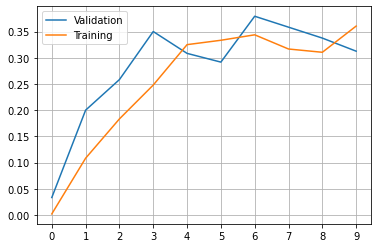

In [100]:
plt.plot(rnn.epoch, rnn.history["val_porcentaje_margen"], label="Validation")
plt.plot(rnn.epoch, rnn.history["porcentaje_margen"], label="Training")
plt.legend()
plt.grid()
plt.xticks(rnn.epoch)
plt.show()

### Practica 3 - II

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from scipy.cluster.hierarchy import cut_tree, linkage

In [102]:
data = datasets.load_iris()

In [103]:
X = StandardScaler().fit_transform(data.data)
Y = data.target

In [104]:
max_clusters = 15
min_clusters = 3

k = []
for i in range(min_clusters, max_clusters + 1):
    k.append(str(i))

tabla = pd.DataFrame(columns=k, data=np.zeros((1, max_clusters - min_clusters + 1), dtype=float))
tabla.columns.name = "Clusters"

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=2/3, stratify=Y)

In [106]:
for c in k:
    kmean = KMeans(n_clusters=int(c), random_state=0)
    kmean.fit(X_train)
    moda = -1 * np.ones(int(c), dtype="int")
    for i in range(int(c)):
        moda[i] = mode(Y_train[kmean.labels_ == i])[0]
    pred = moda[kmean.predict(X_test)]
    tabla.loc[0, c] = accuracy_score(pred, Y_test)
tabla

Clusters     3    4     5     6     7     8     9    10   11    12   13    14  \
0         0.78  0.8  0.82  0.88  0.82  0.92  0.96  0.98  1.0  0.96  1.0  0.96   

Clusters   15  
0         1.0

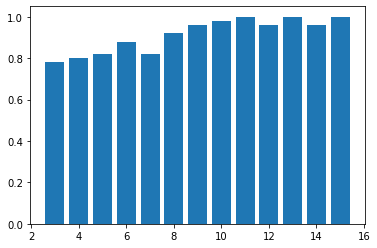

In [107]:
plt.bar(np.arange(min_clusters, max_clusters + 1, dtype="int"), tabla.mean(axis=0))
plt.show()

In [108]:
print("Cluster:", str(tabla.columns[tabla.mean(axis=0).argmax()]))

Cluster: 11


In [109]:
print("AC:", str(tabla.mean(axis=0).max()))

AC: 1.0


### Practica 7 - II

In [110]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

In [111]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print((X_train.shape, X_test.shape), (Y_train.shape, Y_test.shape))
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train.astype("float32")/255
X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test.astype("float32")/255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

((60000, 28, 28), (10000, 28, 28)) ((60000,), (10000,))


In [112]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [113]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), validation_steps=1, epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 7s 6ms/step - loss: 0.6650 - accuracy: 0.7565 - val_loss: 0.9340 - val_accuracy: 0.6875
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.4268 - accuracy: 0.8440 - val_loss: 0.6323 - val_accuracy: 0.8125
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.3624 - accuracy: 0.8659 - val_loss: 0.5516 - val_accuracy: 0.7812
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.3229 - accuracy: 0.8815 - val_loss: 0.5072 - val_accuracy: 0.8594
Epoch 5/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2954 - accuracy: 0.8920 - val_loss: 0.5239 - val_accuracy: 0.9062
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2735 - accuracy: 0.8989 - val_loss: 0.4923 - val_accuracy: 0.8906
Epoch 7/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2563 - accuracy: 0.9052 - val_loss: 0.4831 - val_accuracy: 0.9062
Epoch 

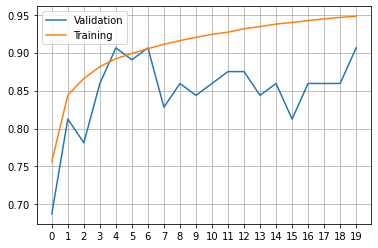

In [114]:
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation")
plt.plot(history.epoch, history.history["accuracy"], label="Training")
plt.legend()
plt.grid()
plt.xticks(history.epoch)
plt.show()

### Practica 5 - III

In [115]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [116]:
class neurona(object):
    def __init__(self, f=0, c=0, dim=0):
        self.c = c
        self.f = f
        self.dim = dim
        self.w = normalize(0.5 - np.random.rand(dim).reshape(1,-1))
        self.label_winner = []
            
    def predict(self, inputs):
        return inputs @ self.w.T
    
    def fit(self, input, alfa=1):
        self.w = normalize(self.w + (alfa*input))
            
    def neuron_labeling(self, inputs, target):
        Y = inputs @ self.w.T
        self.label = target[np.argmax(Y)]
        return self.label

In [117]:
class som():
    
    def __init__(self, filas=1, columnas=1, dim=1):
        self.lista = []
        self.filas = filas
        self.columnas = columnas
        self.dim = dim
        for fila in range(self.filas):
            for columna in range(self.columnas):
                self.lista.append(neurona(f=fila, c=columna, dim=dim))
                
    def fit(self, inputs, max_epochs=1, init_radious=0, init_alfa=1):
        self.radious = init_radious
        self.alfa = init_alfa
        t = 0
        P = inputs.shape[0]
        for epoch in range(max_epochs):
            for x in inputs:
                self.alfa = init_alfa/(1.0 + float(t/P))
                i_gana, y_gana = -1, float('-inf')
                for i in range(self.filas*self.columnas):
                    y_predict = self.lista[i].predict(x.reshape(1,-1))
                    if y_predict > y_gana:
                        y_gana = y_predict
                        i_gana = i
                f_gana = int(i_gana / self.columnas)
                c_gana = i_gana % self.columnas
                
                # Conjunto de vecinas para un radious
                for f in range(f_gana - self.radious, f_gana + self.radious+1):
                    if f < 0:
                        row = self.filas + f
                    else:
                        if f > self.filas-1:
                            row = f % self.filas
                        else:
                            row = f

                    for c in range(c_gana - self.radious, c_gana + self.radious+1):
                        if c < 0:
                            column = self.columnas + c 
                        else:
                            if c > self.columnas-1:
                                column = c % self.columnas
                            else:
                                column = c
                        self.lista[(row*self.columnas) + column].fit(x.reshape(1,-1), alfa=self.alfa)
                t += 1
                if (t%1000) == 0:
                    print(t, self.radious, "  ", end='')
            if self.radious > 0:
                self.radious -= 1
                            
    def neuron_labeling(self, inputs, target):
        self.labels = []
        for i in range(self.filas*self.columnas):
            # print(X.shape, self.target.shape)
            self.labels.append(self.lista[i].neuron_labeling(inputs, target))
            # print(self.lista[i].labeling(X, target=y_deseada, etiquetado='neurona'))
 
    def predict(self, inputs):
        output_list = []
        for x in inputs:
            for i in range(self.filas*self.columnas):
                output_list.append(self.lista[i].predict(x.reshape(1,-1)))
        return np.array(output_list).reshape(inputs.shape[0], -1)    
    
    def label_predict(self, inputs):
        label_list = []
        for x in inputs:
            label_list.append(self.labels[np.argmax(self.predict(x.reshape(1,-1)))])
        return np.array(label_list).reshape(inputs.shape[0], -1)

In [120]:
mnist = pd.read_hdf("MNIST_7000.h5")

In [123]:
mnist_ext = np.append(mnist.iloc[:,:-1], np.ones((mnist.iloc[:,:-1].shape[0], 1), dtype=float), axis=1)

In [127]:
X = normalize(mnist_ext, axis=1)
Y = np.array(mnist.iloc[:,-1])

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1000, stratify=Y)

In [138]:
mao = som(filas=10, columnas=6, dim=X_train.shape[1])

In [139]:
mao.fit(inputs=X_train, max_epochs=20, init_radious=2, init_alfa=20)

1000 2   2000 2   3000 2   4000 2   5000 2   6000 2   7000 1   8000 1   9000 1   10000 1   11000 1   12000 1   13000 0   14000 0   15000 0   16000 0   17000 0   18000 0   19000 0   20000 0   21000 0   22000 0   23000 0   24000 0   25000 0   26000 0   27000 0   28000 0   29000 0   30000 0   31000 0   32000 0   33000 0   34000 0   35000 0   36000 0   37000 0   38000 0   39000 0   40000 0   41000 0   42000 0   43000 0   44000 0   45000 0   46000 0   47000 0   48000 0   49000 0   50000 0   51000 0   52000 0   53000 0   54000 0   55000 0   56000 0   57000 0   58000 0   59000 0   60000 0   61000 0   62000 0   63000 0   64000 0   65000 0   66000 0   67000 0   68000 0   69000 0   70000 0   71000 0   72000 0   73000 0   74000 0   75000 0   76000 0   77000 0   78000 0   79000 0   80000 0   81000 0   82000 0   83000 0   84000 0   85000 0   86000 0   87000 0   88000 0   89000 0   90000 0   91000 0   92000 0   93000 0   94000 0   95000 0   96000 0   97000 0   98000 0   99000 0   100000 0   101000 0

In [140]:
mao.neuron_labeling(X_train, Y_train)

In [141]:
labels = mao.label_predict(X_test)

In [142]:
accuracy_score(labels, Y_test)

0.728